In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("Student_v2.csv")
df.head()

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied,Register Number
0,7.6950,1952,605,8.535304,155,32,4.903273,12808ABC
1,8.2393,1953,691,8.752756,82,30,4.513093,13288ABC
2,7.7858,1955,507,8.651894,134,29,5.114469,3438ABC
3,6.9845,1957,423,8.148109,107,26,5.153673,3167ABC
4,6.8772,1958,584,8.519016,192,25,4.583450,2966ABC


In [3]:
df[['Year','Register Number']].groupby(['Year'], as_index=False).count()

,Year,Register Number
0,1952,6
1,1953,6
2,1955,6
3,1957,6
4,1958,6
5,1959,6
6,1960,6
7,1961,6
8,1962,6
9,1963,6


The `Year` values all coincide with `Register Number` values. So `Register Number` column can be dropped as it would have the exact same correlation as year if converted into numerics.

In [4]:
df.drop(['Register Number'], axis=1, inplace=True);

In [5]:
df.shape

(150, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
PG_CGA                       150 non-null float64
Year                         150 non-null int64
GMAT score                   150 non-null int64
UG CGPA                      150 non-null float64
Number of friends            150 non-null int64
Number of classes present    150 non-null int64
Number of hours studied      150 non-null float64
dtypes: float64(3), int64(4)
memory usage: 8.3 KB


All the remaining variables in the dataframe are numeric types.

In [7]:
df.describe()

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,7.077224,1965.800000,608.133333,8.284005,148.186667,17.240000,5.491061
std,0.679552,7.561826,129.886459,0.450615,73.520703,7.640127,0.482024
min,6.043500,1952.000000,377.000000,7.017811,33.000000,4.000000,4.344806
25%,6.518700,1960.000000,538.250000,7.956388,89.500000,10.250000,5.203779
50%,7.021100,1966.000000,602.500000,8.297489,129.500000,16.500000,5.493907
75%,7.531975,1972.000000,700.750000,8.612294,187.000000,23.000000,5.870920
max,8.693700,1978.000000,833.000000,9.151705,295.000000,32.000000,6.556109


In [8]:
df.corr()

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied
PG_CGA,1.000000,-0.428453,0.149223,0.442718,-0.553956,0.430445,-0.304735
Year,-0.428453,1.000000,0.017090,-0.174904,0.022377,-0.994839,0.815542
GMAT score,0.149223,0.017090,1.000000,-0.328864,-0.279612,-0.023920,0.033556
UG CGPA,0.442718,-0.174904,-0.328864,1.000000,-0.036063,0.171602,-0.133189
Number of friends,-0.553956,0.022377,-0.279612,-0.036063,1.000000,-0.022208,-0.019722
Number of classes present,0.430445,-0.994839,-0.023920,0.171602,-0.022208,1.000000,-0.813474
Number of hours studied,-0.304735,0.815542,0.033556,-0.133189,-0.019722,-0.813474,1.000000


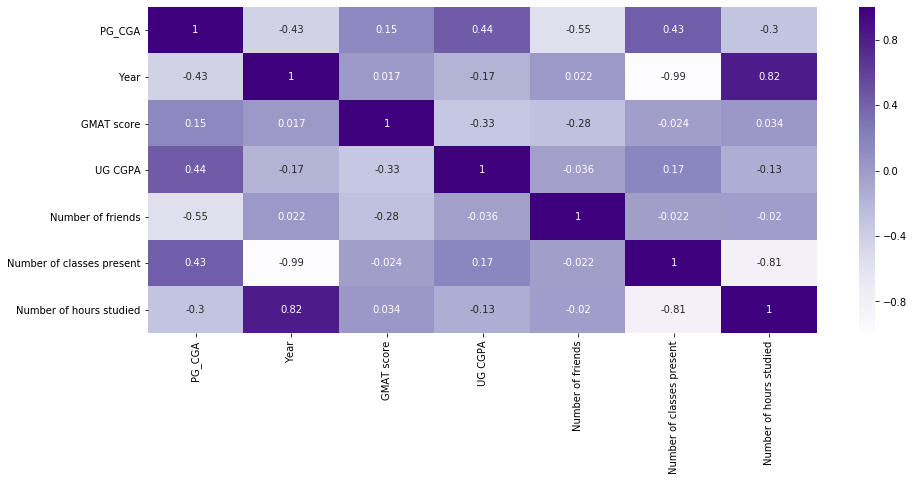

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='Purples', annot=True);

From the heatmap, it is visible that the target variable `PG_CGA` has the highest correlation with `UG CGPA`. So, that is going to be an ideal use case for simple linear regression.

To avoid multicollinearity, `Years` will be dropped.

In [10]:
df.drop(['Year'], axis=1, inplace=True);

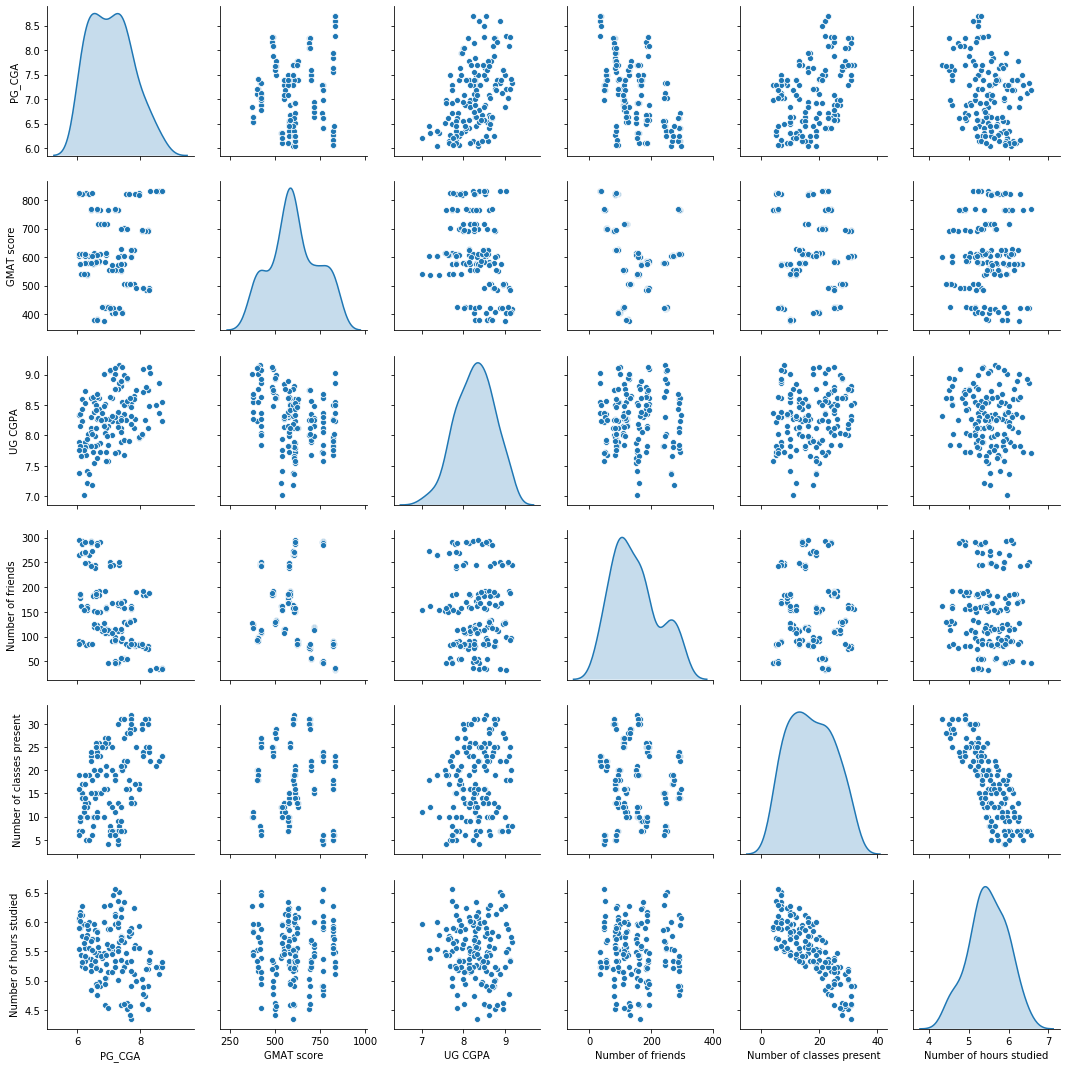

In [11]:
sns.pairplot(df, diag_kind='kde');

### Train test split

In [50]:
y = df[['PG_CGA']]

In [52]:
df.head()

,PG_CGA,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied
0,7.6950,605,8.535304,155,32,4.903273
1,8.2393,691,8.752756,82,30,4.513093
2,7.7858,507,8.651894,134,29,5.114469
3,6.9845,423,8.148109,107,26,5.153673
4,6.8772,584,8.519016,192,25,4.583450


In [53]:
y.head()

,PG_CGA
0,7.6950
1,8.2393
2,7.7858
3,6.9845
4,6.8772


In [54]:
df_train, df_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=100)

In [55]:
df_train.shape, df_test.shape, y_train.shape, y_test.shape

((105, 6), (45, 6), (105, 1), (45, 1))

## Simple Linear Regression

In [205]:
X_train = df_train[['UG CGPA']]
X_test = df_test[['UG CGPA']]

In [74]:
reg = LinearRegression().fit(X_train,y_train)

In [75]:
reg.coef_, reg.intercept_

(array([[0.68787589]]), array([1.41576703]))

Therefore, the equation formed is-

$PG\_CGA = 0.825*UG\ CGPA + 0.292$

In [76]:
y_train_pred = reg.predict(X_train)

In [79]:
r2_score(y_train, y_train_pred)

0.21918660268241852

In [80]:
y_test_pred = reg.predict(X_test)

In [81]:
r2_score(y_test, y_test_pred)

0.12275247621345542

## Multiple Linear Regression

In [245]:
X_train = df_train[['UG CGPA','Number of friends','Number of classes present']]
X_test = df_test[['UG CGPA','Number of friends','Number of classes present']]

In [246]:
X_train.shape, X_test.shape

((105, 3), (45, 3))

In [247]:
reg = LinearRegression().fit(X_train, y_train)

In [248]:
reg.coef_, reg.intercept_

(array([[ 0.58377053, -0.00440936,  0.03221834]]), array([2.35024437]))

The equation formed is-

$PG\_CGA = 0.583*UG\ CGPA - 0.004*Number\ of\ friends + 0.032*Number\ of\ classes\ present + 2.35$

In [249]:
y_train_pred = reg.predict(X_train)

In [250]:
r2_score(y_train, y_train_pred)

0.5693914243714536

In [251]:
y_test_pred = reg.predict(X_test)

In [252]:
r2_score(y_test, y_test_pred)

0.6710164767239206

### Standardizing to get a better interpretation of individual variables

In [253]:
scaler = MinMaxScaler()

In [254]:
X_train[['UG CGPA','Number of friends','Number of classes present']] = scaler.fit_transform(X_train)

In [255]:
X_train.describe()

,UG CGPA,Number of friends,Number of classes present
count,105.000000,105.000000,105.000000
mean,0.592294,0.425311,0.483673
std,0.212217,0.276866,0.266527
min,0.000000,0.000000,0.000000
25%,0.457519,0.223077,0.285714
50%,0.602710,0.357692,0.500000
75%,0.725250,0.576923,0.678571
max,1.000000,1.000000,1.000000


In [256]:
reg = LinearRegression().fit(X_train, y_train)

In [257]:
reg.coef_, reg.intercept_

(array([[ 1.24570456, -1.14643334,  0.90211348]]), array([6.42599061]))

Therefore, the new equation formed is-

$PG\_CGA = 1.245*UG\ CGPA - 1.146*Number\ of\ friends + 0.902*Number\ of\ classes\ present + 6.425$

## Interpretation and Insights from the model

The insight to be derived from the model is very clear after the standardization of the variables.
The variable with the most impact on `PG_CGA` is the `UG CGPA`, followed by a high negative impact from `Number of friends`, also followed by a lower positive impact from `Number of classes present`.

Given that all the other variables remain constant, it can be interpreted that-

   1. For every 1 unit of increase in `UG CGPA`, the `PG_CGA` <b>increases</b> by 1.245 units.
   2. For every 1 unit of increase in `Number of friends`, the `PG_CGA` <b>decreases</b> by 1.146 units.
   3. For every 1 unit of increase in `Number of classes present`, the `PG_CGA` <b>increases</b> by 0.902 units.